# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 3.4.2 Range Profile - Backhoe
---

**Import modules**

In [1]:
%matplotlib inline

import numpy as np

from scipy.io import loadmat

from scipy.constants import pi, speed_of_light

from matplotlib import pyplot as plt

**Load the signature file**

In [2]:
data = loadmat('backhoe_el000_az350to100.mat')

VV = np.squeeze(data['VV'])

HH = np.squeeze(data['HH'])

HV = np.squeeze(data['HV'])

frequency = np.squeeze(data['FGHz'])

azimuth = np.squeeze(data['AZ'])

**Set the window type**

In [3]:
window_type = 'Hanning'

**Set the number of frequencies**

In [4]:
nf = 261

**Display the bandwidth (MHz)**

In [5]:
bandwidth = (frequency[nf] - frequency[1]) * 1e9 / 1e6

print(f'Bandwidth {bandwidth:.2f} MHz')

Bandwidth 3004.76 MHz


**Get the signature data**

In [6]:
#Get the index for data with azimuth of 360 degrees

index = np.argwhere(azimuth == 360)


# Select the signature data

signal_vv = np.squeeze(VV[0:261,index])

signal_hh = np.squeeze(HH[0:261,index])

signal_hv = np.squeeze(HV[0:261,index])

**Apply the selected window**

In [7]:
# Get the window coefficients
if window_type == 'Hanning':
        
    coefficients = np.hanning(nf)
    
elif window_type == 'Hamming':
    
    coefficients = np.hamming(nf)
    
else:
    
    coefficients = np.ones_like(signal_vv)
        
        
        
# Apply the selected window

signal_vv = signal_vv * coefficients

signal_hh = signal_hh * coefficients

signal_hv = signal_hv * coefficients

**Form the range profiles**

In [8]:
# Form the range profiles

rp_vv = np.fft.fftshift(np.fft.ifft(signal_vv, 4096))

rp_hh = np.fft.fftshift(np.fft.ifft(signal_hh, 4096))

rp_hv = np.fft.fftshift(np.fft.ifft(signal_hv, 4096))



# Set up the time array (s)

T = 1e-9 / (2 * (frequency[1] - frequency[0]))

t = np.linspace(-0.5 * T * speed_of_light, 0.5 * T * speed_of_light, 4096)


# Normalize the profiles to HH polarization

factor = np.max(np.abs(rp_hh))

**Plot the results**

In [9]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 6)

**Display the range profiles for VV, HH, and HV**

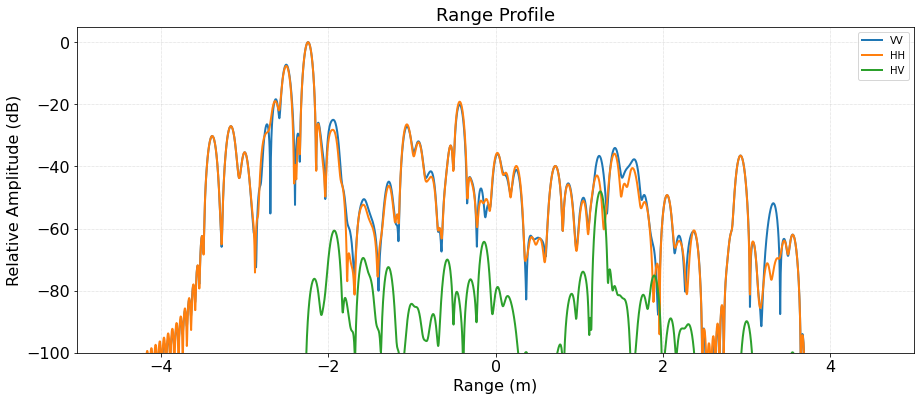

In [10]:
# Plot the results

plt.figure

plt.plot(t, 20 * np.log10(np.abs(rp_vv) / factor), linewidth=2, label='VV')

plt.plot(t, 20 * np.log10(np.abs(rp_hh) / factor), linewidth=2, label='HH')

plt.plot(t, 20 * np.log10(np.abs(rp_hv) / factor), linewidth=2, label='HV')



# Set the x- and y-axis limit

plt.ylim(-100, 5)

plt.xlim(-5, 5)


# Set the labels and title

plt.title('Range Profile', size=18)

plt.xlabel('Range (m)', size=16)

plt.ylabel('Relative Amplitude (dB)', size=16)



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Display the legend

plt.legend(loc='best')

plt.show()